In [1]:
#import liabraries 
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#define working directory 
os.chdir('C:\\Users\\User\\OneDrive - National University of Sciences & Technology\\Uni STUDY\\Internship\\Data-Glacier-Internship\\Week 2')

In [3]:
#import dataset
cab_data = pd.read_csv("DataSets/Cab_Data.csv")
city = pd.read_csv("DataSets/City.csv")
customer = pd.read_csv("DataSets/Customer_ID.csv")
transaction = pd.read_csv("DataSets/Transaction_ID.csv")

In [5]:
#anomolous data found 
# date of travel seems to be uninterpretable as of now 

In [6]:
#top 5 rows of Cab_Data.csv
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
#top 5 rows of City.csv
city.head(25)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [8]:
#top 5 rows of Customer_ID.csv
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
#top 5 rows of Transaction_ID.csv
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
#The population column was in string format
# to use it we had to convert it to float
city['Population'] = city['Population'].str.replace(',', '').astype(float)

In [11]:
pd.to_numeric(city["Population"])

0     8405837.0
1     1955130.0
2     1595037.0
3     1339155.0
4     1177609.0
5     1030185.0
6      959307.0
7      943999.0
8      942908.0
9      814885.0
10     754233.0
11     698371.0
12     671238.0
13     631442.0
14     629591.0
15     545776.0
16     542085.0
17     418859.0
18     327225.0
19     248968.0
Name: Population, dtype: float64

In [12]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


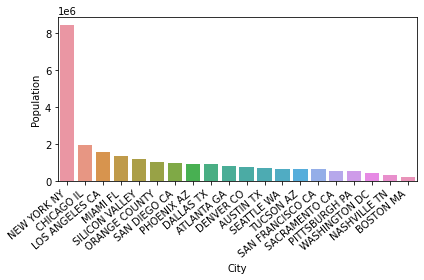

In [13]:
# which cities have the most population residing in them. 
# conclusion: this will indicate which cities can possibly be the most profitable
ax = sns.barplot(data=city, x="City", y="Population")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Income (USD/Month)'>

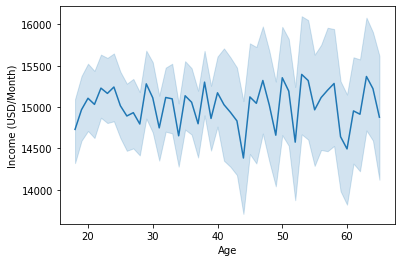

In [14]:
#plotting a line graph for age and income from customer table (no conclusion is to be drawn from this)
sns.lineplot(data=customer, x="Age", y="Income (USD/Month)")

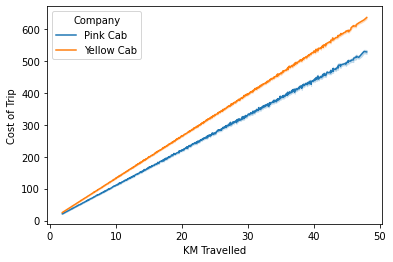

In [15]:
#Cost of trip for both the cabs (conclusion drawn: Pink Cab drives more efficiently and has a lower cost of travel)
ax = sns.lineplot(data=cab_data, x="KM Travelled", y="Cost of Trip", hue="Company")

In [16]:
#defining the profit column
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

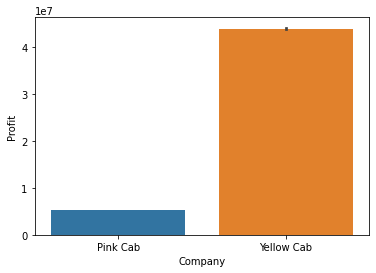

In [17]:
#total profit plot for both companies (conclusion drawn: yellow cab is far more profitable than pink cab)
ax = sns.barplot(x="Company", y="Profit", data=cab_data, estimator=sum)

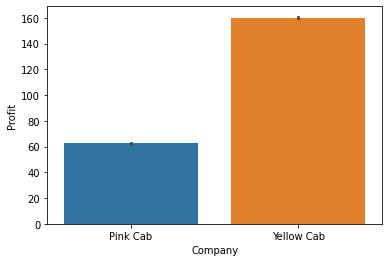

In [18]:
#avg Profit plot for both the cabs 
ax = sns.barplot(data=cab_data, x='Company', y='Profit')

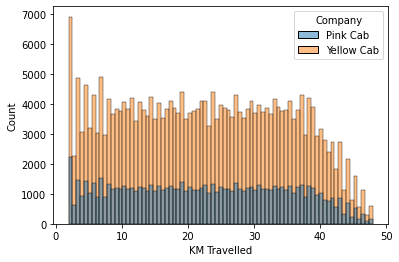

In [19]:
#differences in whcih company travalled the most 
#(conclusion drawn: we can infer Yellow cab is used more by people due to higher distance travelled by it)
ax = sns.histplot(data=cab_data, x="KM Travelled", hue="Company")

In [20]:
#create a profit plot according to age 
df_1 = pd.read_csv("DataSets/Cab_Data.csv", index_col = "Transaction ID")
df_2 = pd.read_csv("DataSets/Transaction_ID.csv", index_col = "Transaction ID")
df_1 = df_1.join(df_2)
df_1.to_csv("DataSets/new_csv.csv")

In [21]:
df_3 = pd.read_csv("DataSets/new_csv.csv", index_col = "Customer ID")
df_4 = pd.read_csv("DataSets/Customer_ID.csv", index_col = "Customer ID")
df_3 = df_3.join(df_4)
df_3.to_csv("DataSets/new2_csv.csv")

In [22]:
#Now we just add the profit column in our new file which is new2_csv and then draw age, profit graph
df_3['Profit'] = df_3['Price Charged'] - df_3['Cost of Trip']


In [23]:
df_3 

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Profit
Customer ID,,,,,,,,,,,,
1,10008434,42406,Yellow Cab,NEW YORK NY,42.48,1422.30,576.0288,Cash,Male,36,16359,846.2712
1,10012732,42433,Pink Cab,NEW YORK NY,42.40,703.09,457.9200,Card,Male,36,16359,245.1700
1,10053182,42564,Yellow Cab,NEW YORK NY,8.12,233.10,100.3632,Card,Male,36,16359,132.7368
1,10055394,42575,Yellow Cab,NEW YORK NY,20.52,564.04,278.2512,Cash,Male,36,16359,285.7888
1,10074090,42616,Yellow Cab,NEW YORK NY,22.54,596.98,294.8232,Cash,Male,36,16359,302.1568
...,...,...,...,...,...,...,...,...,...,...,...,...
60000,10393188,43392,Yellow Cab,BOSTON MA,8.00,114.87,111.3600,Cash,Female,27,20303,3.5100
60000,10425458,43449,Yellow Cab,BOSTON MA,10.40,141.24,124.8000,Card,Female,27,20303,16.4400
60000,10425480,43445,Yellow Cab,BOSTON MA,9.70,127.62,132.6960,Card,Female,27,20303,-5.0760


In [24]:
# test=df_3.head(5000)

In [25]:
df_3.reset_index(drop=True, inplace=True)

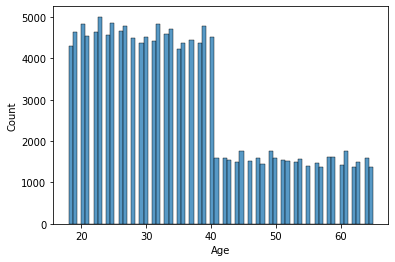

In [26]:
#payment mode (Cash) according to age (num of ppl paying by cash)
#conclusion: {defined after the next plot}
ax = sns.histplot(data=df_3.query("Payment_Mode=='Cash'"), x='Age')

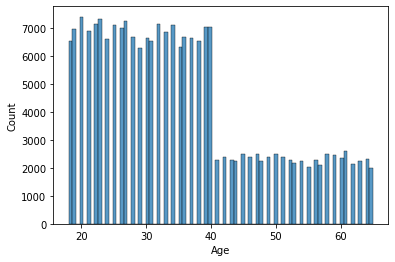

In [27]:
#payment mode (Card) according to age (num of ppl paying by card)
#conclusion: {defined in the next line}
ax=sns.histplot(data=df_3.query("Payment_Mode=='Card'"), x='Age')

In [28]:
#after comparing the two hist plots above
#conclusion: more people pay by card therefore acceptances of all bank cards is to be instilled 
#however the population paying by cash is also massive which is why cash should also be accepted by drivers

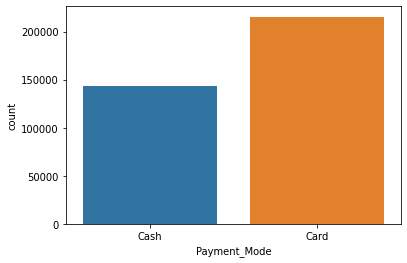

In [29]:
#people paying by card or by cash (conclusion drawn: what do people often use. card or cash)
#conclusion: since a significant population uses card the investors should focus on integrating card payments through as many vendors as possible
ax = sns.countplot(x="Payment_Mode", data=df_3)

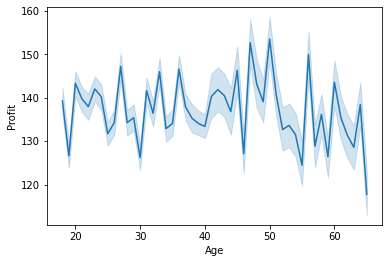

In [30]:
#Profit according to age (conclusion drawn: no conclusion)
ax = sns.lineplot(data=df_3, x='Age', y='Profit')


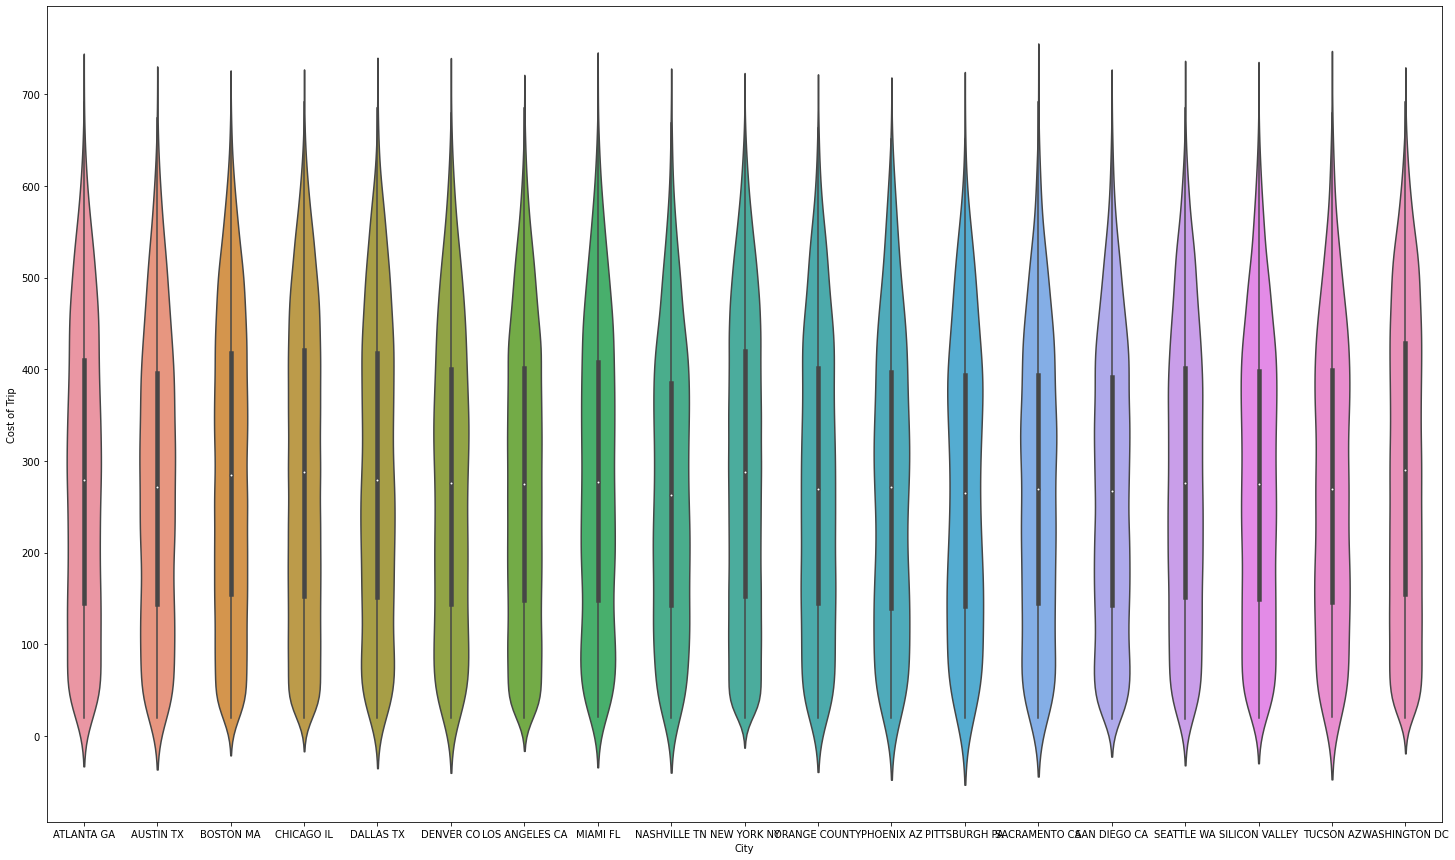

In [31]:
# here we have tried to represent cost of travel according to the mean, median and percentiles in different cities
# conlusion: cost of trip in major cities like newyork, washington, boston etc is high compared to cities like nashville and austin
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
g = sns.violinplot(x="City", y="Cost of Trip", data=cab_data, width=0.5)


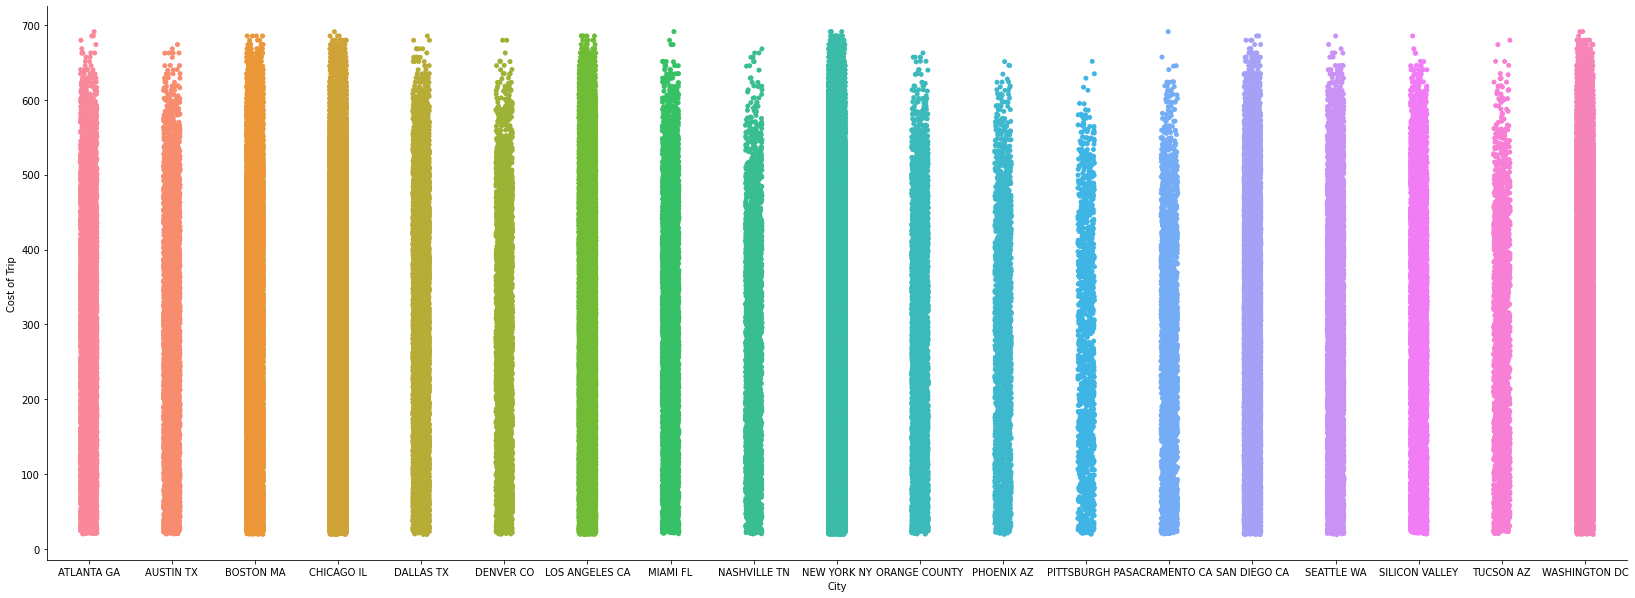

In [32]:
#cities like boston, chicago, los angeles, new york, and washington have very high usage of taxi 
g = sns.catplot(data=cab_data, x='City', y='Cost of Trip')
g.fig.set_figwidth(30)
g.fig.set_figheight(9)

In [33]:
# We should therefore focus on ciites 
# Boston, Chicago, Los Angeles, New York, Washington
# Find what is the mean age of people riding in these cities 
# Find out what is the mean income of people living in these cities

In [34]:
# df_3 = pd.read_csv("DataSets/new2_csv.csv", index_col = "Transaction ID")

In [35]:
# df_3 = df_3.head(10000)

In [36]:
df_3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,10008434,42406,Yellow Cab,NEW YORK NY,42.48,1422.30,576.0288,Cash,Male,36,16359,846.2712
1,10012732,42433,Pink Cab,NEW YORK NY,42.40,703.09,457.9200,Card,Male,36,16359,245.1700
2,10053182,42564,Yellow Cab,NEW YORK NY,8.12,233.10,100.3632,Card,Male,36,16359,132.7368
3,10055394,42575,Yellow Cab,NEW YORK NY,20.52,564.04,278.2512,Cash,Male,36,16359,285.7888
4,10074090,42616,Yellow Cab,NEW YORK NY,22.54,596.98,294.8232,Cash,Male,36,16359,302.1568
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10393188,43392,Yellow Cab,BOSTON MA,8.00,114.87,111.3600,Cash,Female,27,20303,3.5100
359388,10425458,43449,Yellow Cab,BOSTON MA,10.40,141.24,124.8000,Card,Female,27,20303,16.4400
359389,10425480,43445,Yellow Cab,BOSTON MA,9.70,127.62,132.6960,Card,Female,27,20303,-5.0760
359390,10434169,43462,Yellow Cab,BOSTON MA,35.64,603.94,487.5552,Cash,Female,27,20303,116.3848


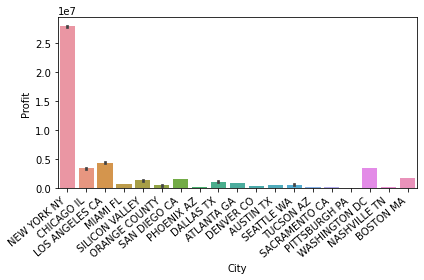

In [37]:
# Average Profit from each city
# conclusion drawn: We can spot the places which give the most profit is New York, Chicago, Los Angeles, Washington DC, Silicon Valley, San Diego and Boston MA
# These cities are to be focused on the most by investors 
ax = sns.barplot(data=df_3, y='Profit', x='City', estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

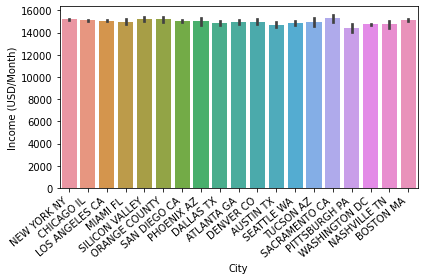

In [38]:
# Average age of citizens living in the five cities 
# conclusion drawn: We can spot the average income is pretty similar in all the cities, therefore no evident conclusion
ax = sns.barplot(data=df_3, y='Income (USD/Month)', x='City')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

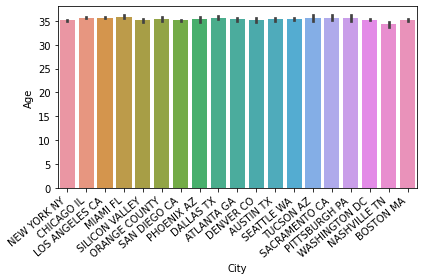

In [39]:
# Average age of citizens living in the five cities 
# conclusion drawn: We can spot the average income is pretty similar in all the cities, therefore no evident conclusion
ax = sns.barplot(data=df_3, y='Age', x='City')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [40]:
# After exploing all the hypothesis shown above
# I would recommend investors to invest their money in Yellow Cab despite the high cost of travel
# They carry massive profit margin compared to their competitor  
# By the plots above we can also infer that Yellow cab is used more than Pink cab. Which is why investors will end up generating more return on investment 
# We also infered that more people pay by card, however this does not negate the usage of cash by users. Massive population of users use cash whcih is why it will also have to be catered
# we also saw which cities were possibly the most populated from whcih we infered New York was the most populated while others were somewhat close
# However when we saw total profits for each city we got to know that cities like Boston and Silicon Valley despite lower population ended up yeliding profits greater than cities with high population
# Therefore we would recommend investors to focus on cities like New York, Chicago, Los Angeles, Washington DC, Silicon Valley, San Diego and Boston MA